<a href="https://colab.research.google.com/github/MJSarvajith/Data-Science-Python/blob/main/AIandML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

The dataset includes 1,303 laptop configurations and 12 attributes associated with it that describe the brand name, form factor, display attributes (resolution, aspect ratio, etc.), CPU/GPU attributes, memory configuration, operating system, weight, and price (in euros). Of the columns, only two columns contain only numeric values ("Inches", "Price_euros"), while many of the numeric-like appearances are actually stored as text; for example, "Ram" is "8GB", "Weight" is "1.37kg", and "ScreenResolution" is "1920x1080".

**Dataset**

https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset

**Import Libraries**

In [276]:
# Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [277]:
df = pd.read_csv("LaptopData.csv")

**Preview of Dataset**

In [278]:
df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


**Dataset Description**

1,303 records of laptops will contain 12 attributes: brand, model, screen size, resolution, CPU, RAM, storage, GPU, operating system, weight, and price in euros. Price in euros, or rather Price_euros, can be used to predict price and as a target variable in regression models. Other fields, such as RAM, Weight, and Memory, also have to be preprocessed into numeric values. The dataset is extremely useful for machine learning and market insight techniques allowing analyzing feature importance, such as CPU, GPU, RAM, and storage, for classifying products into budget, mid-range, and high-end price segments.

**Information about Dataset**

In [279]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [280]:
print(df.columns)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


**Check for missing values**

In [281]:

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [282]:
print(df.Ram)

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object


**Summary statistics**

In [283]:

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0          Price
count  1273.000000    1273.000000
mean    652.674784   59955.814073
std     376.493027   37332.251005
min       0.000000    9270.720000
25%     327.000000   31914.720000
50%     652.000000   52161.120000
75%     980.000000   79333.387200
max    1302.000000  324954.720000


In [284]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Number of outliers in Price:", outliers.shape[0])

Number of outliers in Price: 28


In [285]:
import scipy.stats as stats

df['z_score_price'] = stats.zscore(df['Price'])
outliers = df[df['z_score_price'].abs() > 3]
print("Outliers (Price):", outliers.shape[0])

Outliers (Price): 0


**Before Cleaning**

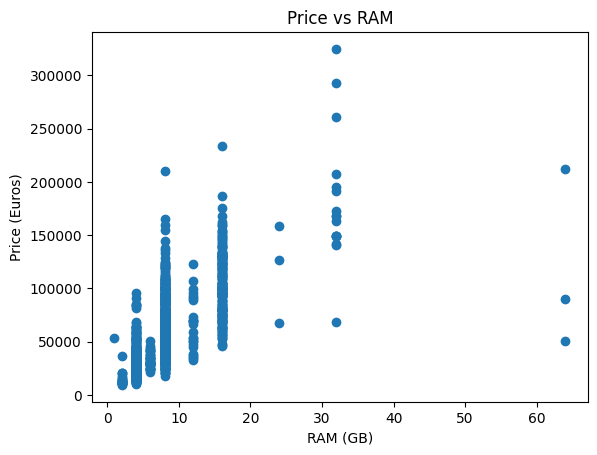

In [286]:
# Cleaning the 'Ram' column: remove "GB" and converting to numeric
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)
df.dropna(subset=['Ram'], inplace=True)

# Numeric Conversion
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')
df.dropna(subset=['Ram'], inplace=True)

plt.scatter(df['Ram'], df['Price'])
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.title("Price vs RAM")
plt.show()


**After Cleaningg**

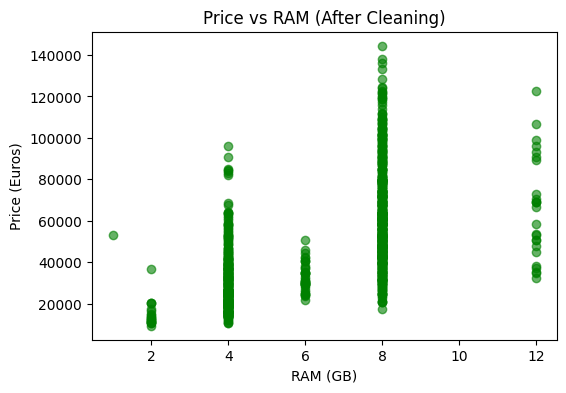

Before Cleaning: 1273 rows
After Cleaning : 1052 rows


In [287]:
# \Cleaning the RAM column
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')
df = df.dropna(subset=['Ram', 'Price'])

# Removal of Outliers using IQR for both Price and Ram
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Including the IQR method cleaning for Price and Ram
df_clean = remove_outliers_iqr(df, 'Price')
df_clean = remove_outliers_iqr(df_clean, 'Ram')

# Illustrating Scatterplot After Cleaning
plt.figure(figsize=(6,4))
plt.scatter(df_clean['Ram'], df_clean['Price'], alpha=0.6, color="green")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.title("Price vs RAM (After Cleaning)")
plt.show()

print("Before Cleaning:", df.shape[0], "rows")
print("After Cleaning :", df_clean.shape[0], "rows")


**Treating Missing Values in Ram**

In [288]:
print(f"Median Ram {df['Ram'].median()}")
print(f"Mean Ram: {df['Ram'].mean()}")

df['Ram']=df['Ram'].fillna(df['Ram'].median())

Median Ram 8.0
Mean Ram: 8.462686567164178


**Preprocessing**

In [289]:
def handle_missing_values(df):
    df = df.copy()

    # 1. Drop rows where Price is missing
    df = df.dropna(subset=['Price'])

    # 2. For all other columns → fill missing values
    for col in df.columns:
        if col == 'Price':
            continue
        if df[col].dtype == 'object':
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col] = df[col].fillna(mode_val[0])
            else:
                df[col] = df[col].fillna("Unknown")
        else:
            df[col] = df[col].fillna(df[col].median())

    return df
df = handle_missing_values(df)

print("Any missing left?")
print(df.isnull().sum())
print("Shape after handling:", df.shape)

Any missing left?
Unnamed: 0             0
Company                0
TypeName               0
Inches                 0
ScreenResolution       0
Cpu                    0
Ram                    0
Memory                 0
Gpu                    0
OpSys                  0
Weight                 0
Price                  0
z_score_price       1273
dtype: int64
Shape after handling: (1273, 13)


**Model Training and Evaluation**

In [300]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define epochs and batch size
ep = 50  # Number of epochs
bs = 32  # Batch size


model_reg = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prep.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])


model_reg.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse', metrics=['mae'])


model_reg.fit(X_train_prep, y_train,
              validation_data=(X_test_prep, y_test),
              epochs=ep, batch_size=bs, verbose=0)

# Predictions
y_pred = model_reg.predict(X_test_prep, verbose=0)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Regression Model Final Evaluation:")
print(f"MAE  : {mae:.2f} euros")
print(f"RMSE : {rmse:.2f} euros")
print(f"R²   : {r2:.2f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Regression Model Final Evaluation:
MAE  : 14723.71 euros
RMSE : 19961.00 euros
R²   : 0.66


**Random Forest Regression**

In [301]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_prep, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test_prep)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Final Evaluation:")
print(f"MAE  : {mae_rf:.2f} euros")
print(f"RMSE : {rmse_rf:.2f} euros")
print(f"R²   : {r2_rf:.2f}")


Random Forest Regression Final Evaluation:
MAE  : 10760.37 euros
RMSE : 16655.34 euros
R²   : 0.77


**Model Comparison**

In [302]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Neural Network (Keras)", "Random Forest"],
    "MAE (€)": [mae, mae_rf],
    "RMSE (€)": [rmse, rmse_rf],
    "R²": [r2, r2_rf]
})

print("\nModel Comparison:")
print(results)



Model Comparison:
                    Model       MAE (€)      RMSE (€)        R²
0  Neural Network (Keras)  14723.707744  19961.001250  0.662667
1           Random Forest  10760.371844  16655.336876  0.765144


**Conclusions**

1. Deploy the Random Forest model for laptop price prediction, as it provides the most accurate results.

2. Continue improving feature engineering (e.g., more detailed CPU/GPU categories, brand-based features) to further reduce errors.

3. Monitor model performance regularly and retrain with updated market data to keep predictions aligned with changing laptop trends.

**GIthub Link**

https://github.com/MJSarvajith/Data-Science-Python/blob/main/AIandML.ipynb